# Classifying Movie Genres Based on the Title and Plot

Cameron Wonchoba

Andrew Leo

Tou Yang

# Overview

Movies are put into categories called `genres`. These genres describe the expectations that a person should have when they watch the movie.

We are given a data set that maps each movie title and their plot to the genre they are in. Using Natural Language Processing, we will identify what genre the movie is based on the title and plot. 

Developing a tool that can accurately identify these genres based on the genre and plot may help movie creators effectively write a movie title and generic plot. Once they create their title and plot, they could pass it into this model and verify that it conveys the message that they intend.

This is a multiclass classification problem that will utilize Natural Language Processing.

## What is Natural Language Processing?

Natural Language processing allows computers to analyze and understand human written language. Ultimately, we want to be able to parse the natural language in a way that is valuable. 

There are two parts of a language that the computer needs to be able to understand:

### Syntax
Syntax describes the way we arrange words to make a sentence that is grammatically correct. Syntax is important to help the computer learn the structure of our language. It helps to learn if each sentence is grammatically correct or not. 

### Semantics
Semantics describes the meaning behind each word, sentence or phrase. Semantics are important to help the computer understand the meaning behind indiviudal words and combination of words. This becomes difficult when words have more than one meaning. For example:

1. I crashed my car.
2. I crashed on my couch.

Here, the word "crashed" have different meanings. 

In the first example, "crashed" means destroyed or ruined.

In the second example, "crashed" means sleep.

Helping a computer understand these subtle differences in meaning can be difficult to do.

## Techniques/Libraries to Used in NLP
Below is a list of libraries and tools that may help us in the project.

1. Natural Language Toolkit (NLTK)
    * https://www.nltk.org/
    * Slow and steep learning curve 
2. TextBlob
    * https://textblob.readthedocs.io/en/dev/
    * Easy to learn (great for beginners!), but it is slow
3. CoreNLP
    * https://stanfordnlp.github.io/CoreNLP/
    * Really fast and can be integrated with NLTK
4. Gensim
    * https://github.com/RaRe-Technologies/gensim
    * Specializes in semantic recognition
5. spaCy
    * https://spacy.io/
    * Really fast! Only supports 7 languages (Python is one of them, so we're good).
6. polyglot
    * https://polyglot.readthedocs.io/en/latest/index.html
    * Similar performance to spaCy but supports more languages.
7. scikit–learn
    * https://scikit-learn.org/stable/
    * Great documentation and familiar. Does not use Neural Networks for processing, so it isn't as good.
8. Pattern
    * https://www.clips.uantwerpen.be/pages/pattern
    * Good for webmining, but doesn't include enough NLP tasks


Sources:

https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://sunscrapers.com/blog/8-best-python-natural-language-processing-nlp-libraries/

# Topic Modeling
Here we are going to do a form of topic modeling. Topic Modeling is trying to understand the topic of a piece of text. In our case, the topic can be defined as the genre. We will try to figure out the genre of the movie (topic).

# Data

The data set that we are using can be found here: https://github.com/davidsbatista/text-classification/blob/master/movies_genres.csv.bz2

This data set includes the title, plot and genre of 117,352 movies. The genres that are included in this data set are:
* Action
* Adult 
* Adventure
* Animation
* Biography
* Comedy
* Crime
* Documentary
* Drama
* Family
* Fantasy
* Game-Show
* History
* Horror
* Lifestyle
* Music
* Musical
* Mystery
* News
* Reality-TV
* Romance
* Sci-Fi
* Short
* Sport
* Talk-Show
* Thriller
* War
* Western

> NOTE: Each movie is mapped to only one genre. In practice, it may be the case that movies are mapped to more than one genre.

In [22]:
%matplotlib
import pandas as pd
import numpy as np
import time

pd.set_option('display.max_columns', None)

Using matplotlib backend: Qt5Agg


In [23]:
path_to_data = (r'C:\Users\Mouay\Desktop\data\movies_genres.csv')
movies = pd.read_csv(path_to_data, delimiter='\t')

In [24]:
movies.head()

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Lifestyle,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [25]:
movies['Genre'] = None

for i in range(len(movies)):
    if movies['Action'][i] == 1:
        movies['Genre'][i] = 'Action'
    
    elif movies['Adult'][i] == 1:
        movies['Genre'][i] = 'Adult'

    elif movies['Adventure'][i] == 1:
        movies['Genre'][i] = 'Adventure'
        
    elif movies['Animation'][i] == 1:
        movies['Genre'][i] = 'Animation'
        
    elif movies['Biography'][i] == 1:
        movies['Genre'][i] = 'Biography'
        
    elif movies['Comedy'][i] == 1:
        movies['Genre'][i] = 'Comedy'
        
    elif movies['Crime'][i] == 1:
        movies['Genre'][i] = 'Crime'
        
    elif movies['Documentary'][i] == 1:
        movies['Genre'][i] = 'Documentary'
        
    elif movies['Drama'][i] == 1:
        movies['Genre'][i] = 'Drama'
        
    elif movies['Family'][i] == 1:
        movies['Genre'][i] = 'Family'
        
    elif movies['Fantasy'][i] == 1:
        movies['Genre'][i] = 'Fantasy'
        
    elif movies['Game-Show'][i] == 1:
        movies['Genre'][i] = 'Game-Show'
    
    elif movies['History'][i] == 1:
        movies['Genre'][i] = 'History'
    
    elif movies['Horror'][i] == 1:
        movies['Genre'][i] = 'Horror'
    
    elif movies['Music'][i] == 1:
        movies['Genre'][i] = 'Music'
        
    elif movies['Musical'][i] == 1:
        movies['Genre'][i] = 'Musical'
        
    elif movies['Mystery'][i] == 1:
        movies['Genre'][i] = 'Mystery'
    
    elif movies['News'][i] == 1:
        movies['Genre'][i] = 'News'
    
    elif movies['Reality-TV'][i] == 1:
        movies['Genre'][i] = 'Reality-TV'
    
    elif movies['Romance'][i] == 1:
        movies['Genre'][i] = 'Romance'
        
    elif movies['Sci-Fi'][i] == 1:
        movies['Genre'][i] = 'Sci-fi'
    
    elif movies['Short'][i] == 1:
        movies['Genre'][i] = 'Short'
        
    elif movies['Sport'][i] == 1:
        movies['Genre'][i] = 'Sport'
        
    elif movies['Talk-Show'][i] == 1:
        movies['Genre'][i] = 'Talk-Show'
        
    elif movies['Thriller'][i] == 1:
        movies['Genre'][i] = 'Thriller'
    
    elif movies['War'][i] == 1:
        movies['Genre'][i] = 'War'
    
    else:
        movies['Genre'][i] = 'Western'


C:\Users\Mouay\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Mouay\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Mouay\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Mouay\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value i

In [26]:
movies

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Lifestyle,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Genre
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Comedy
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Reality-TV
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Reality-TV
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Reality-TV
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Reality-TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117347,"""Ørnen: En krimi-odyssé"" (2004)","Ørnen, an Icelandic inspector in the Danish p...",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Crime
117348,"""Øyevitne"" (2014) {(#1.1)}","Two young kids, Henning and Philip are attrac...",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Crime
117349,"""Øyevitne"" (2014) {(#1.3)}",Someone tries to kill a motorcycle gang membe...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Crime
117350,"""Øyevitne"" (2014) {(#1.5)}",Helen sees her investigation forward signific...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Crime


In [35]:
def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)

sum_frame_by_column(movies, 'genre_sum', ['Action','Adult','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Game-Show','History','Horror','Music','Musical','Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Talk-Show','Thriller','War','Western'])

movies = movies[movies.genre_sum == 1]
    
movies

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Lifestyle,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,Genre,genre_sum
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Comedy,1.0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Reality-TV,1.0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Reality-TV,1.0
3,"""#BlackLove"" (2015) {Miss Independent (#1.5)}",All five of these women are independent and s...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Reality-TV,1.0
4,"""#BlackLove"" (2015) {Sealing the Deal (#1.10)}",Despite having gone through a life changing p...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Reality-TV,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117343,"""Öyle Bir Geçer Zaman ki"" (2010) {(#1.1)}",Ali Akarsu is a sea captain that is constantl...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drama,1.0
117344,"""Öyle Bir Geçer Zaman ki"" (2010) {(#1.14)}",Surrounded by flames Captain Ali is in a grea...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drama,1.0
117345,"""Öyle Bir Geçer Zaman ki"" (2010) {(#1.16)}",Berrin and Mete react really strongly towards...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drama,1.0
117346,"""Öyle Bir Geçer Zaman ki"" (2010) {(#1.6)}",To everyone shock Ali keeps his promise and b...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drama,1.0


By dropping the movies with multiple genres we end up with a smaller dataset of 47827

# Exploratory Data Analysis

In [29]:
import nltk
nltk.download('all') # This takes awhile

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Mouay\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Mouay\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Mouay\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Mouay\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Mouay\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\M

True

In [30]:
print(f"There are {movies.shape[0]} rows and {movies.shape[1]} columns.")

There are 47827 rows and 32 columns.


In [31]:
print(f"The movie genres are:\n",'\n'.join(movies.columns[2:].tolist()))

The movie genres are:
 Action
Adult
Adventure
Animation
Biography
Comedy
Crime
Documentary
Drama
Family
Fantasy
Game-Show
History
Horror
Lifestyle
Music
Musical
Mystery
News
Reality-TV
Romance
Sci-Fi
Short
Sport
Talk-Show
Thriller
War
Western
Genre
genre_sum


In [33]:
print("Count of each movie:\n")
movie_counts = []
for col in movies.columns[2:30:]:
    movie_counts += [(col, movies[col].sum())]
movie_counts_df = pd.DataFrame(movie_counts, columns = ["Genre", "Count"])

movie_counts_df = movie_counts_df.sort_values('Count', ascending=False)
movie_counts_df

Count of each movie:



,Genre,Count
5,Comedy,10925
19,Reality-TV,8284
8,Drama,7467
7,Documentary,6090
24,Talk-Show,2777
27,Western,1950
3,Animation,1663
9,Family,1611
18,News,1312
15,Music,743


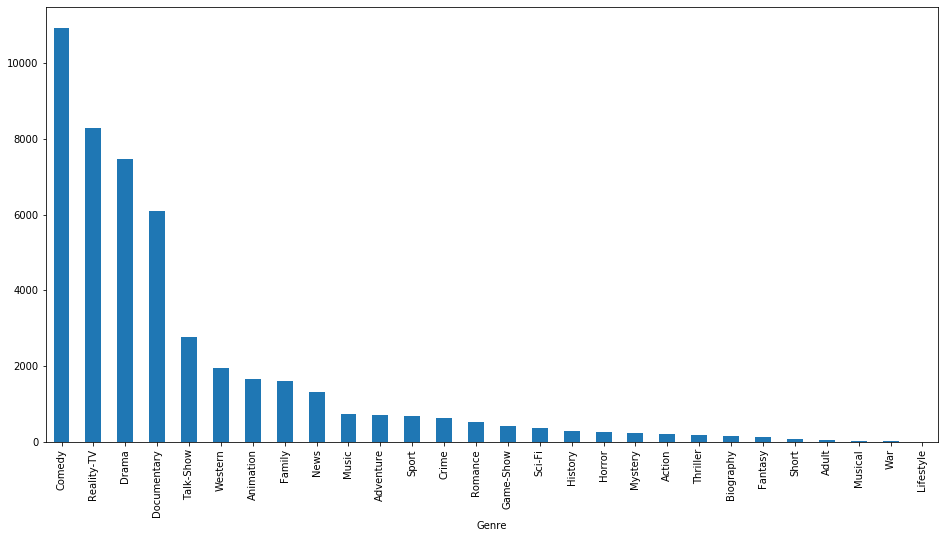

In [34]:
%matplotlib inline
movie_counts_df.plot(x='Genre', y='Count', kind='bar', legend=False, figsize= (16,8))

The most common movie genres are:
* Drama
* Comedy 
* Romance
* Family
* Crime

The least common movie genres are:
* Lifestyle
* Adult
* Short
* Musical
* Biography

There are 0 "lifestyle" movies. We can drop this column.

In [36]:
movies = movies.drop(columns=['Lifestyle'], axis=1)

Are there any weird values in the table?

In [37]:
movies.isnull().any()

title          False
plot           False
Action         False
Adult          False
Adventure      False
Animation      False
Biography      False
Comedy         False
Crime          False
Documentary    False
Drama          False
Family         False
Fantasy        False
Game-Show      False
History        False
Horror         False
Music          False
Musical        False
Mystery        False
News           False
Reality-TV     False
Romance        False
Sci-Fi         False
Short          False
Sport          False
Talk-Show      False
Thriller       False
War            False
Western        False
Genre          False
genre_sum      False
dtype: bool

All values exist

## Lets look at the actual titles and plots

In [38]:
movies['title']

0                                      "#7DaysLater" (2013)
1              "#BlackLove" (2015) {Crash the Party (#1.9)}
2         "#BlackLove" (2015) {Making Lemonade Out of Le...
3             "#BlackLove" (2015) {Miss Independent (#1.5)}
4            "#BlackLove" (2015) {Sealing the Deal (#1.10)}
                                ...                        
117343            "Öyle Bir Geçer Zaman ki" (2010) {(#1.1)}
117344           "Öyle Bir Geçer Zaman ki" (2010) {(#1.14)}
117345           "Öyle Bir Geçer Zaman ki" (2010) {(#1.16)}
117346            "Öyle Bir Geçer Zaman ki" (2010) {(#1.6)}
117351         "Über Österreich - Juwele des Landes" (2016)
Name: title, Length: 47827, dtype: object

Movie titles are surrounded by quotes. We will extract them using the following regular expression:

`"([^"]*)"`

In english, this regular expression can be read as:

Match everything that starts with quotes, contains anything that isn't a quote, followed by zero or more things, followed by a quote. 

In [39]:
# Lets extract the title name.
movies['Extracted Title'] = movies['title'].str.extract(r'"([^"]*)"')

# Now remove the first occurence of the '#' from the string.
movies['Extracted Title'] = movies['Extracted Title'].str.replace('#',"",1)

The year the title was made is surrounded by paranthesis. We will extract them using the following regular expression:

`\((.*?)\)`

In [40]:
movies['year'] = movies['title'].str.extract(r'\((.*?)\)')

It turns out that we also have tv shows in this data set. These can be discovered if there is some text surround by curly braces ({}). We can extract these by using the folloiwng regular expression:

`\{(.*?)\}`

We will then get rid of the episode number (these are defined by paranthesis).

`\(.*\)`

In [41]:
movies['Episode Info'] = movies['title'].str.extract(r'\{(.*?)\}')
movies['Episode Info'] = movies['Episode Info'].str.replace(r"\(.*\)","")

# Detecting languages
We should look at what languages we have. We should only deal with the english language for now.

We will detect the language of the plot. We choose the plot because it has the most words, and it is supposed to be grammatically correct. We can assume that they are grammatically correct as they are uploaded onto IMbD.

https://pypi.org/project/langdetect/

In [42]:
from langdetect import detect

# Apply the detect function for every row on the "plot" column.
# NOTE: This takes a while to complete.
movies['Language'] = movies.apply(lambda row : detect(row['plot']), axis=1)

In [43]:
movies['Language'].value_counts()

en    47786
nl       12
de       10
da        8
it        3
sl        2
no        2
es        2
fr        1
hu        1
Name: Language, dtype: int64

There are some non-english movies in this set. Lets drop the rows that aren't english.

In [44]:
# Keep rows that are in english.
movies = movies[movies['Language'] == 'en']

# Reset the index as they are now messed up (due to the removal of rows)
movies = movies.reset_index()

movies['Language'].value_counts()

en    47786
Name: Language, dtype: int64

# Tokenization
Now we need to tokenize all of the words.

We are opting for the `TweetTokenizer` instead of word_tokenize because the word_tokenizer doesn't seem to handle apostophe's very well. For example:

Give the word `week's`

* word_tokenizer => ['week',"'s"]

* TweetTokenizer => ["week's"]

In [45]:
from nltk.tokenize import TweetTokenizer

start = time.time()

tokenizer = TweetTokenizer()

# For every plot, split it into its respective tokens.
movies["plot_tokens"] =  movies.apply(lambda row : tokenizer.tokenize(row['plot']), axis=1)

print("Time Elapsed: ", time.time() - start)

Time Elapsed:  13.744033813476562


In [46]:
movies['plot'][0]

" #7dayslater is an interactive comedy series featuring an ensemble cast of YouTube celebrities. Each week the audience writes the brief via social media for an all-new episode featuring a well-known guest-star. Seven days later that week's episode premieres on TV and across multiple platforms."

In [47]:
movies['plot_tokens'][0]

['#7dayslater',
 'is',
 'an',
 'interactive',
 'comedy',
 'series',
 'featuring',
 'an',
 'ensemble',
 'cast',
 'of',
 'YouTube',
 'celebrities',
 '.',
 'Each',
 'week',
 'the',
 'audience',
 'writes',
 'the',
 'brief',
 'via',
 'social',
 'media',
 'for',
 'an',
 'all-new',
 'episode',
 'featuring',
 'a',
 'well-known',
 'guest-star',
 '.',
 'Seven',
 'days',
 'later',
 'that',
 "week's",
 'episode',
 'premieres',
 'on',
 'TV',
 'and',
 'across',
 'multiple',
 'platforms',
 '.']

We now have our tokens for each row.

Lets extract these tokens into a list, and find the 20 most common tokens.

In [48]:
# I'm also curious as to how many total tokens we have

plot_tokens_lst = movies["plot_tokens"].tolist()

token_count = 0
for sentence in plot_tokens_lst:
    token_count += len(sentence)

print("Total Number of Tokens: ", token_count)

Total Number of Tokens:  4812095


In [49]:
from nltk.probability import FreqDist
fdist = FreqDist()

for sentence in plot_tokens_lst:
    for word in sentence:
        fdist[word.lower()]+=1
        
fdist.most_common(20)

[('the', 231559),
 ('.', 211963),
 (',', 193983),
 ('to', 144266),
 ('and', 136723),
 ('a', 126550),
 ('of', 89130),
 ('in', 69651),
 ('is', 60478),
 ('with', 47356),
 ('his', 42868),
 ('her', 41614),
 ('for', 40321),
 ('he', 35633),
 ('that', 34485),
 ('on', 33371),
 ('"', 31327),
 ('as', 26428),
 ('but', 24149),
 ('she', 23351)]

In [50]:
# How many unique tokens are there?
print(f"There are {len(fdist)} unique tokens.")

There are 111246 unique tokens.


These tokens seem uninformative... Lets clean up the tokens a bit by removing puncutation and stop noises.

# Removing Noise
Stemming works by cutting off the ends of the words. However, this doesn't always work. Sometimes it will convert a word into a word that is not technically it's root. 

Lemmatization will reduces each word to it's "true" root.

However, we also want to remove the noise (ie. stopwords). To do this, we will use the function that was seen in the In Class 11 exercise.

In addition to cleaning each string, we will also grab the pos_tag of each token and store it.

Originally from: https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

In [51]:
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
from nltk.tag import pos_tag

def remove_noise(tokens, stop_words = ()):
    cleaned_tokens = []

    for token, tag in pos_tag(tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())

    return pos_tag(cleaned_tokens)

In [52]:
from nltk.corpus import stopwords

start = time.time()

movies['plot_tokens_cleaned'] = movies.apply(lambda row : remove_noise(row['plot_tokens'], stopwords.words('english')), axis=1)

print("Time Elapsed: ", time.time() - start)
#takes around and average of 25-30mins to finish - reduced to 9 mins??

Time Elapsed:  595.985728263855


In [53]:
movies['plot_tokens_cleaned']

0        [(#7dayslater, RB), (interactive, JJ), (comedy...
1        [(one, CD), (week, NN), (leave, VBP), (worksho...
2        [(woman, NN), (start, VB), (make, VB), (stride...
3        [(five, CD), (woman, NN), (independent, JJ), (...
4        [(despite, IN), (go, JJ), (life, NN), (change,...
                               ...                        
47781    [(ali, NN), (akarsu, NN), (sea, NN), (captain,...
47782    [(surrounded, VBN), (flame, NN), (captain, NN)...
47783    [(berrin, NN), (mete, JJ), (react, NN), (reall...
47784    [(everyone, NN), (shock, NN), (ali, NN), (keep...
47785    [(georg, NN), (riha, NN), (remain, VBP), (mast...
Name: plot_tokens_cleaned, Length: 47786, dtype: object

# Exploring Word Density
We can look at the most common words within each genre.

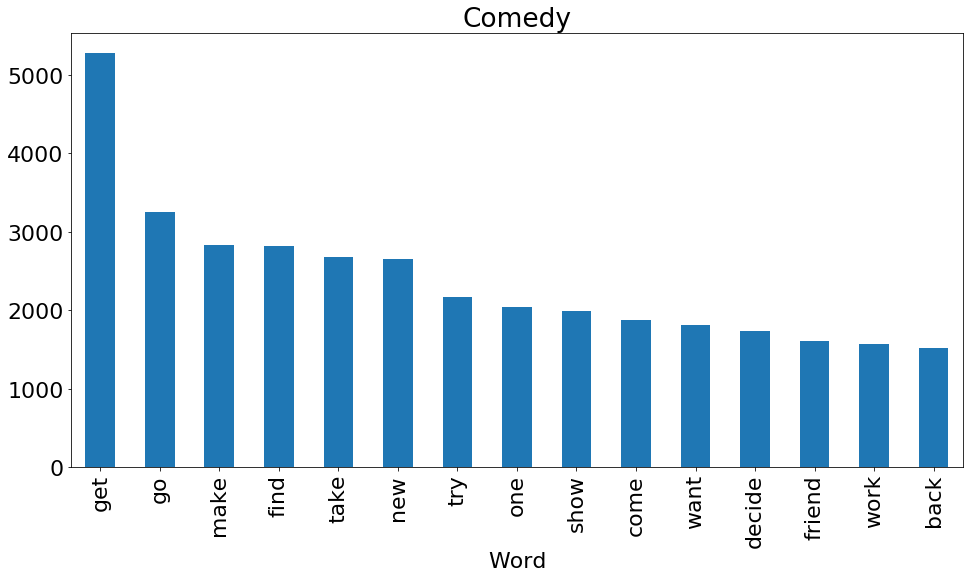

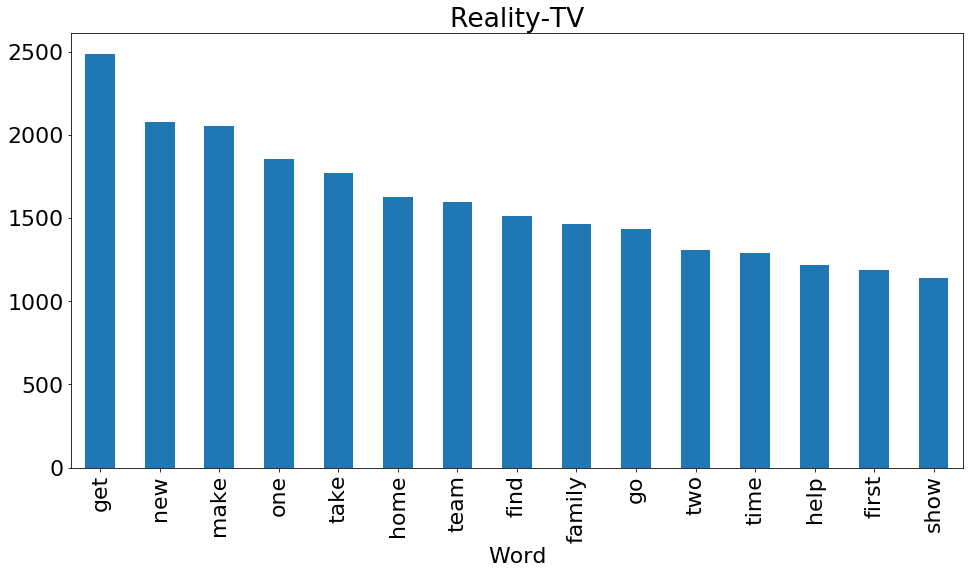

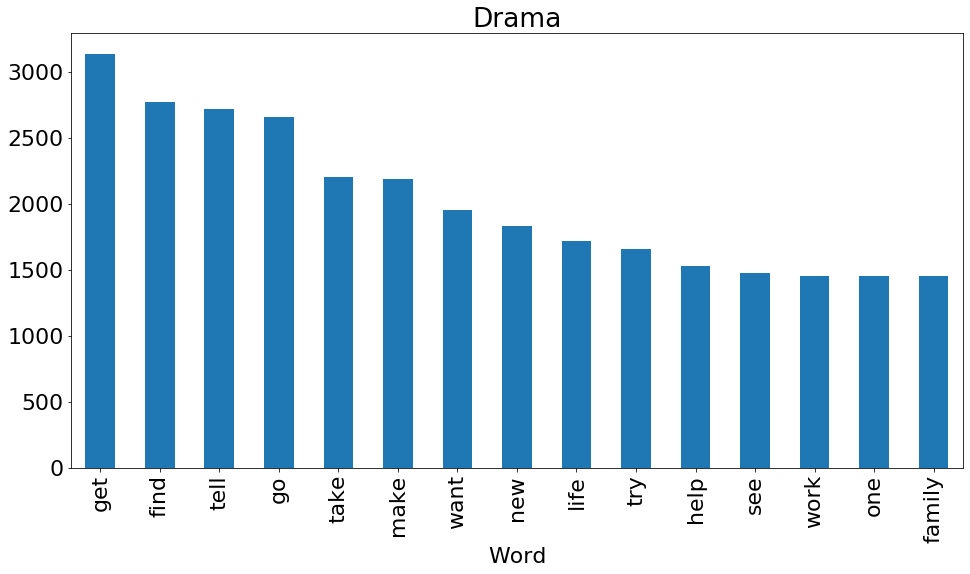

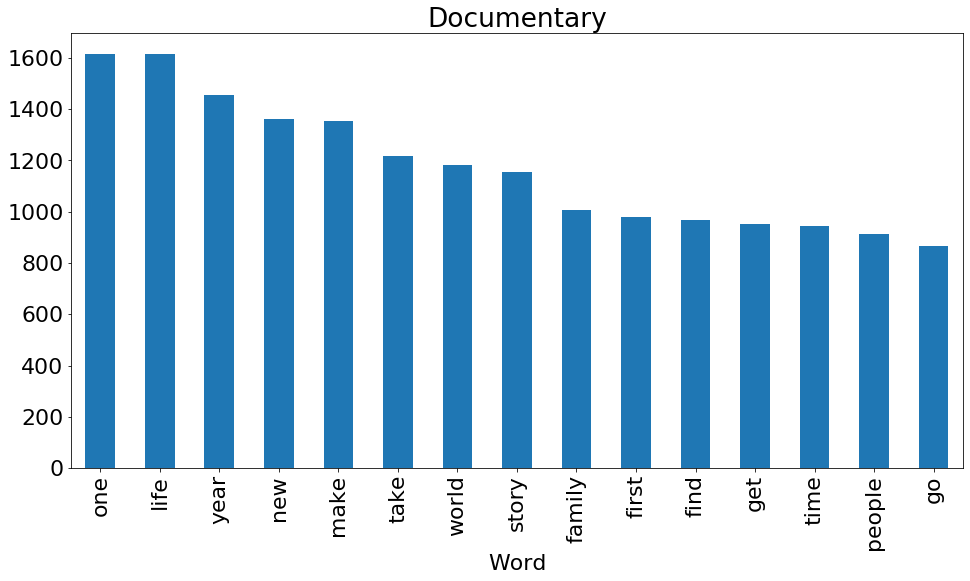

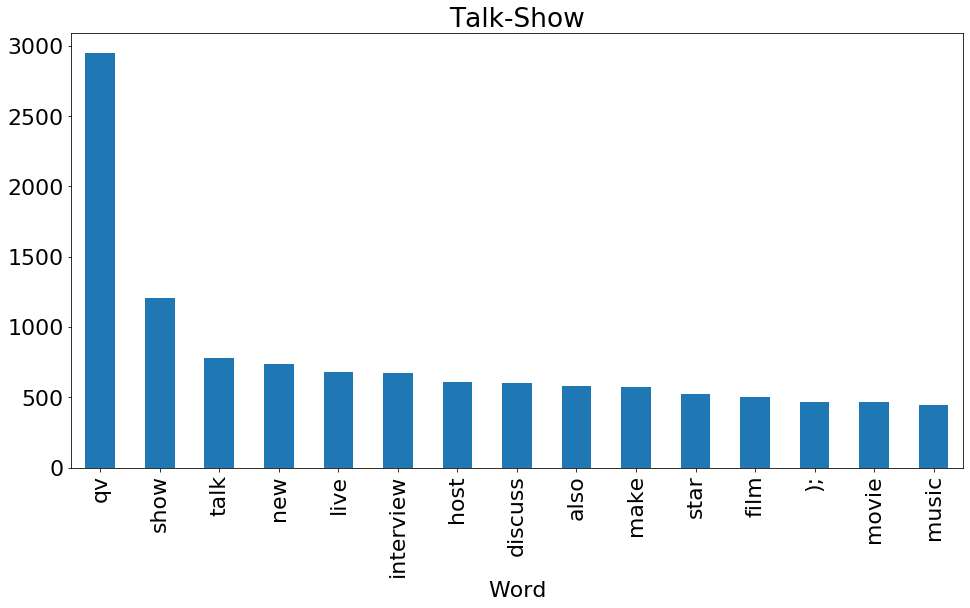

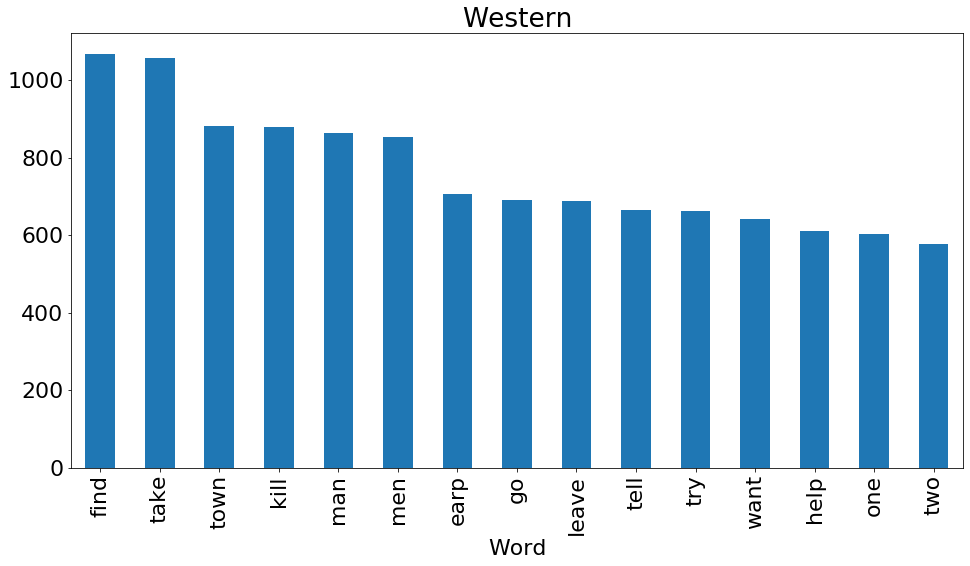

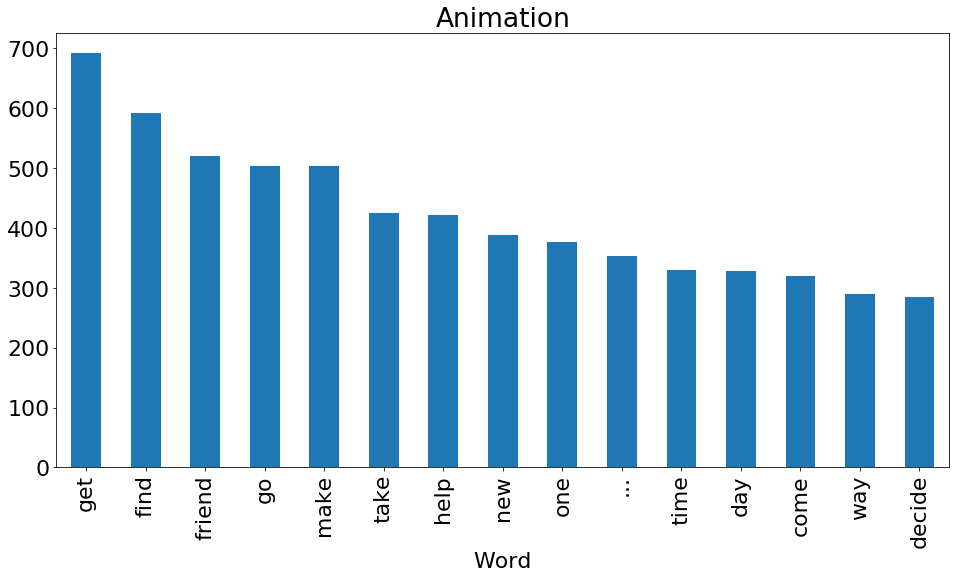

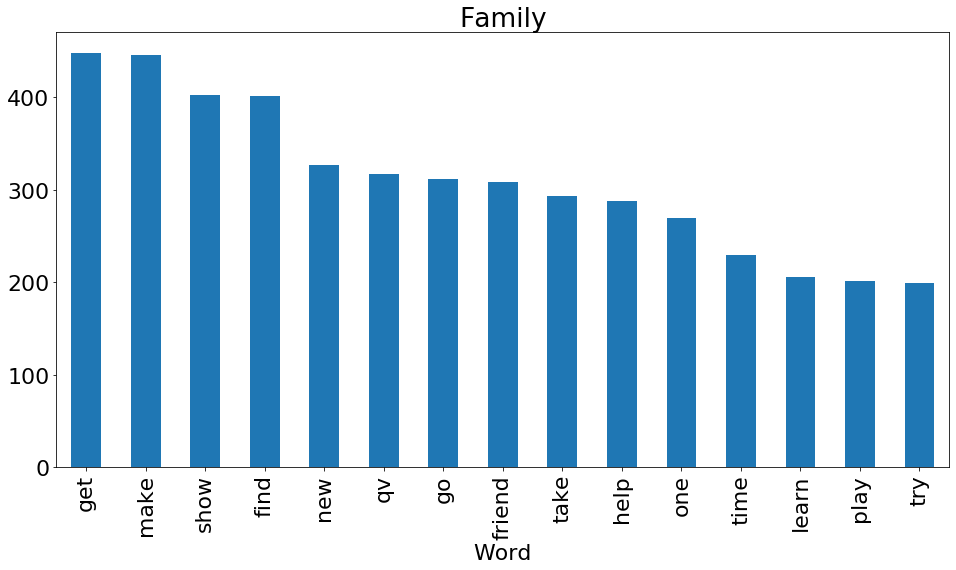

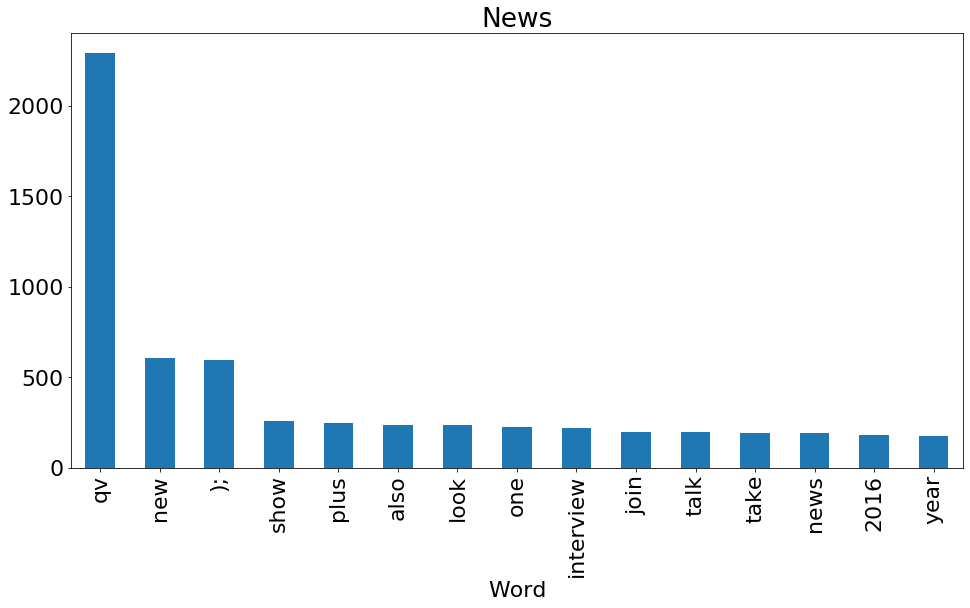

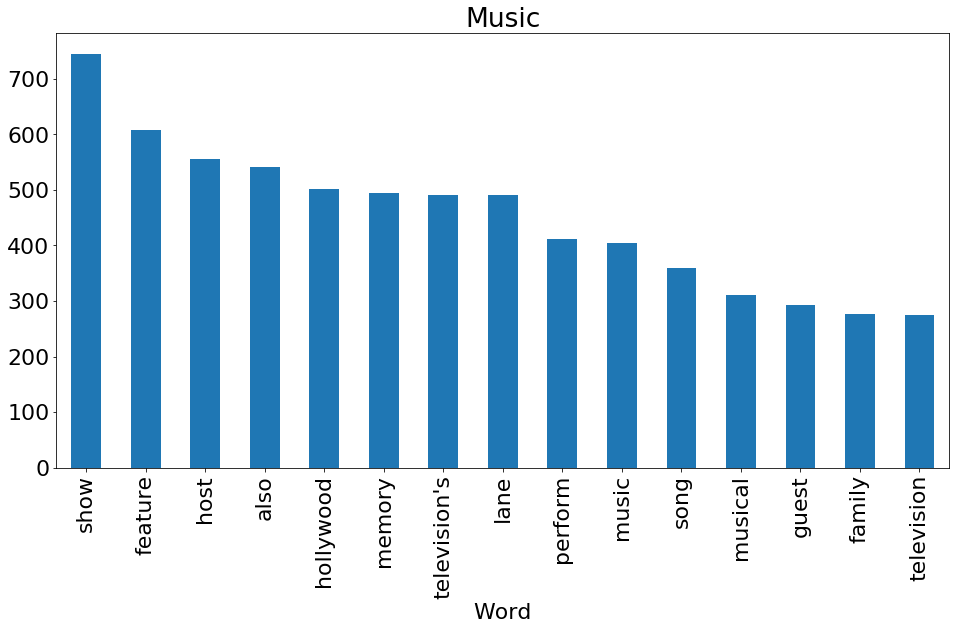

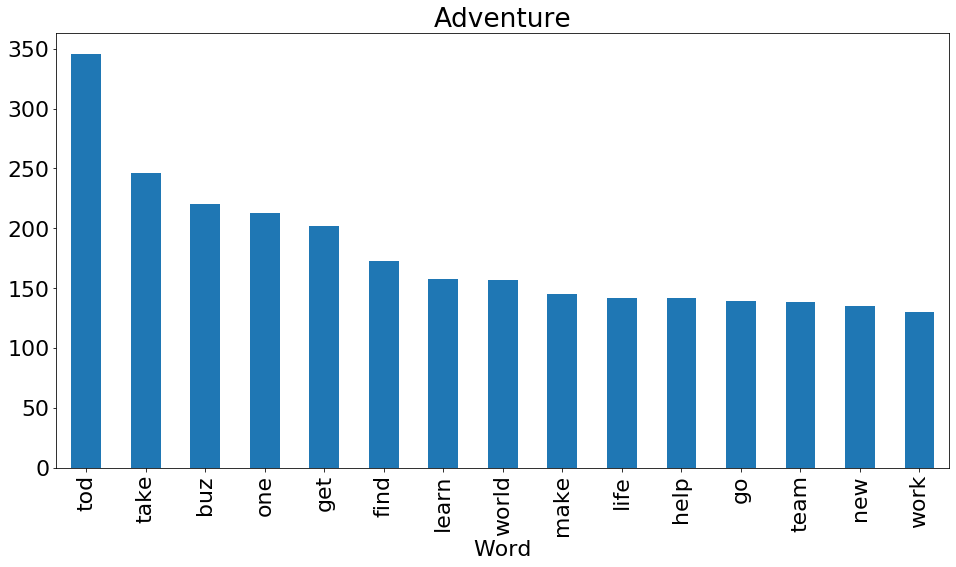

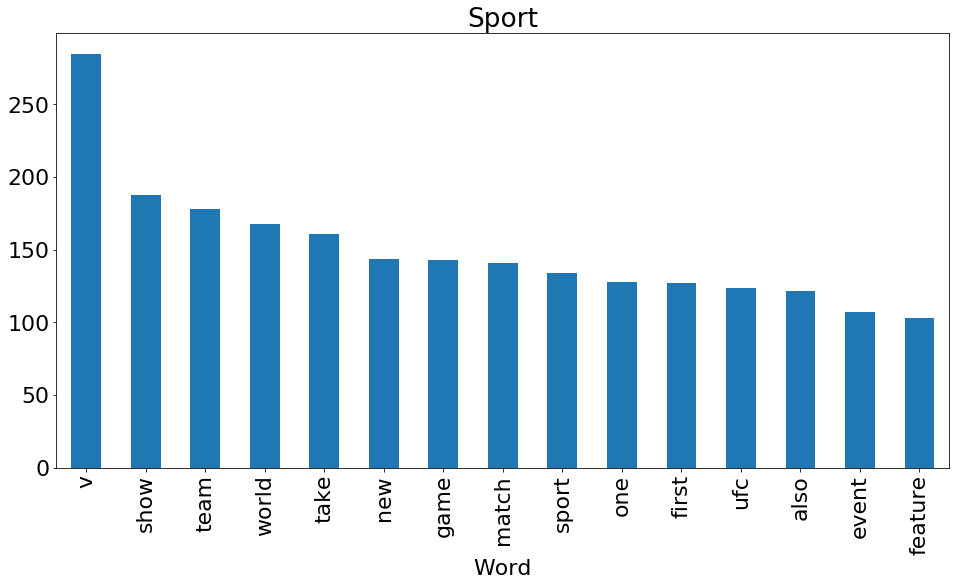

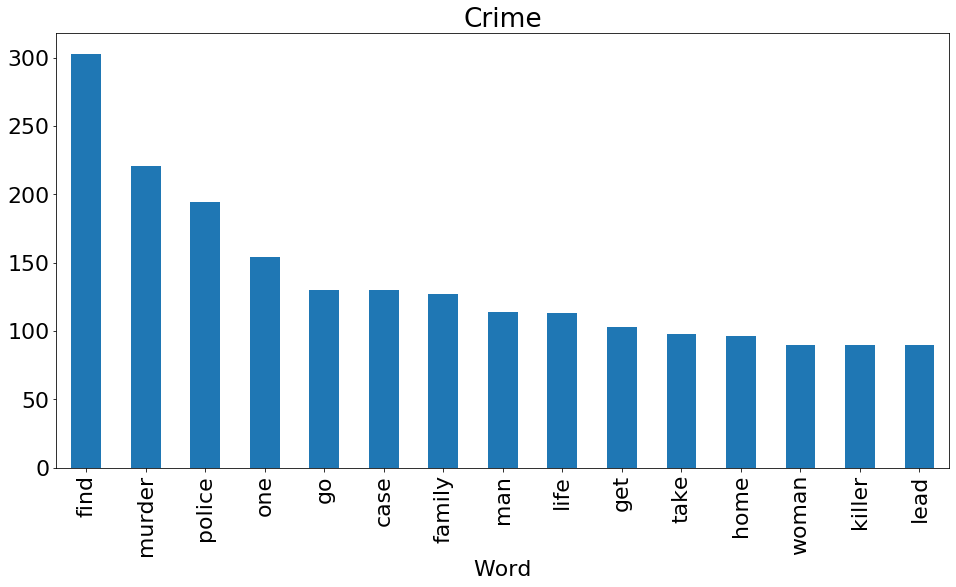

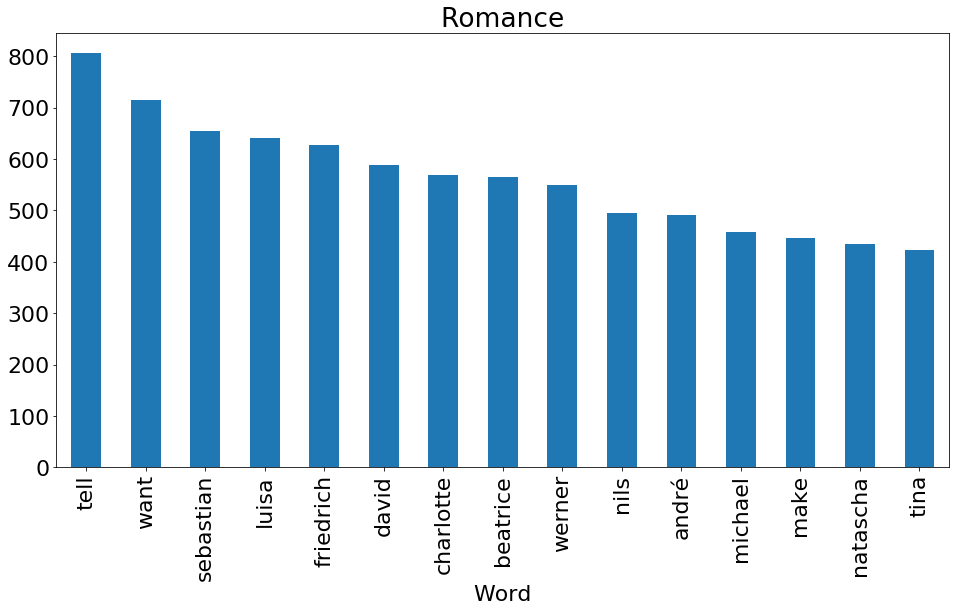

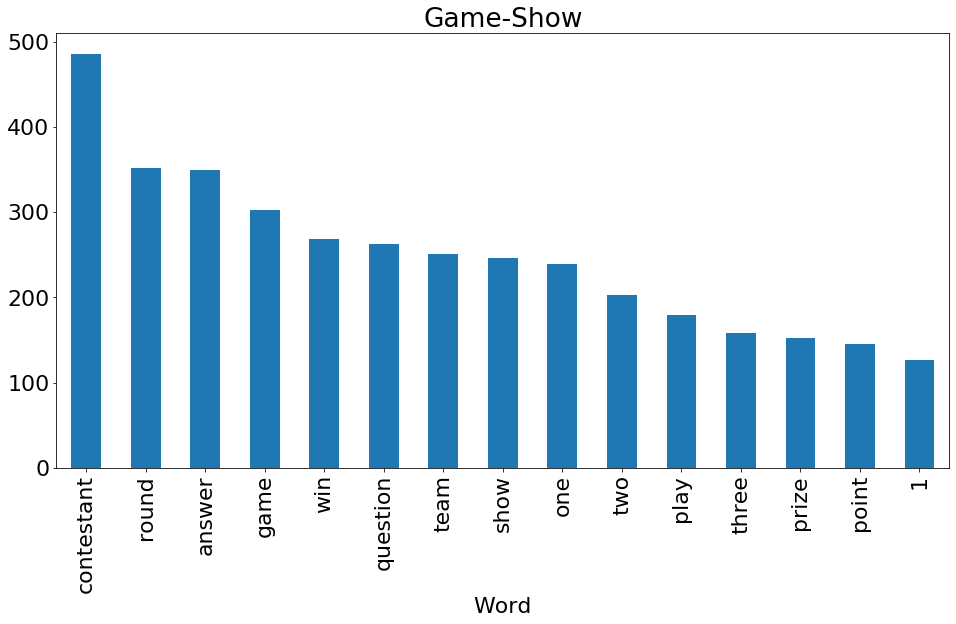

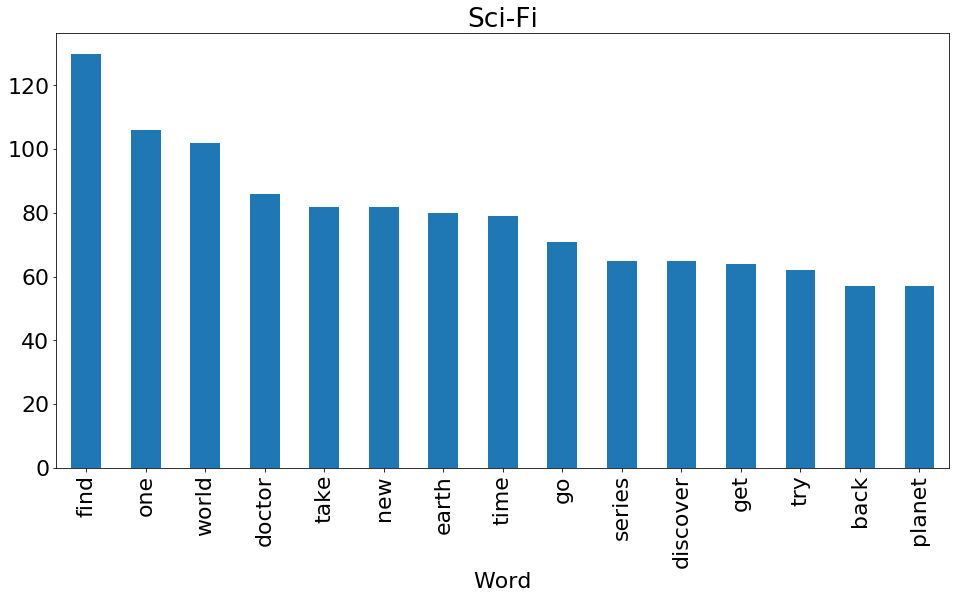

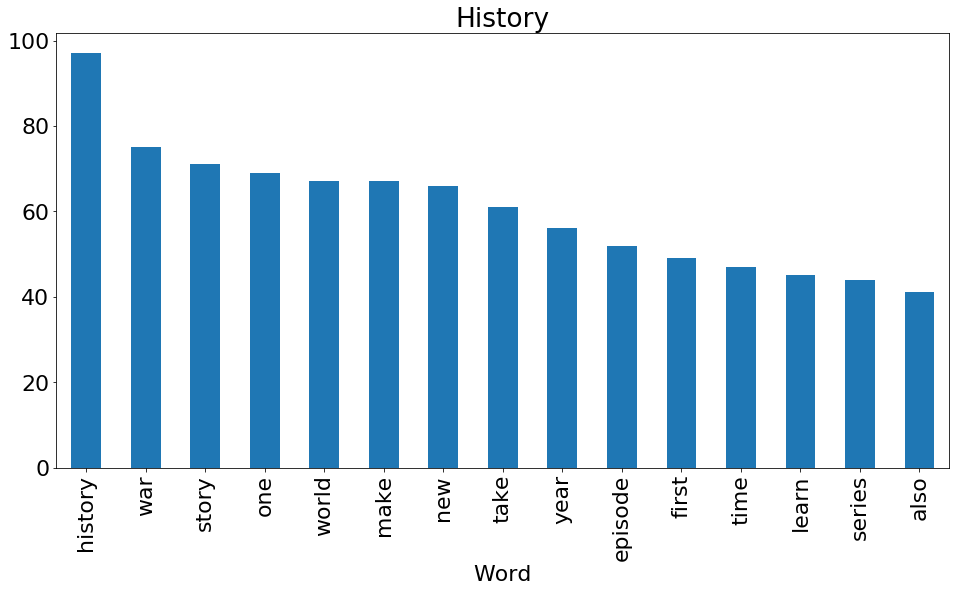

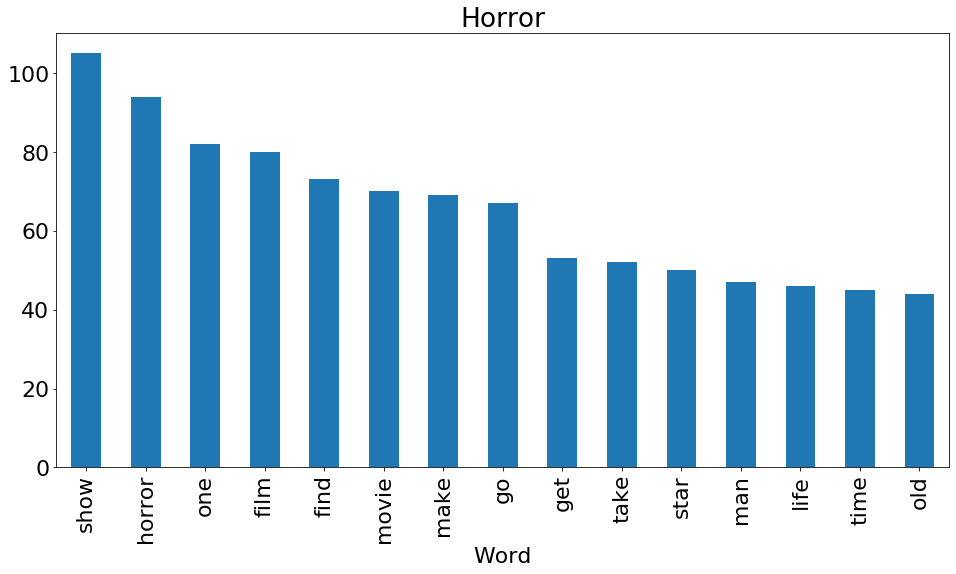

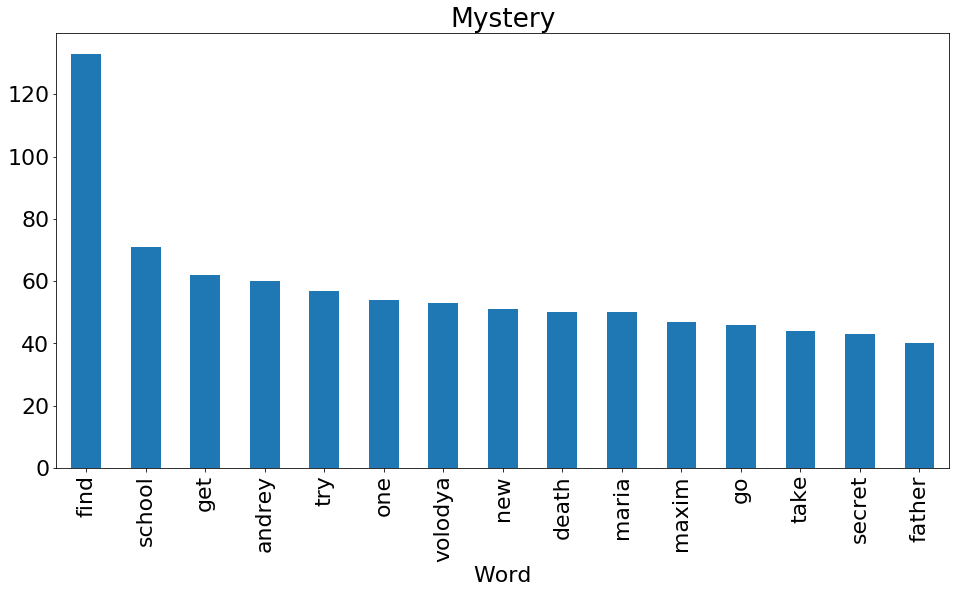

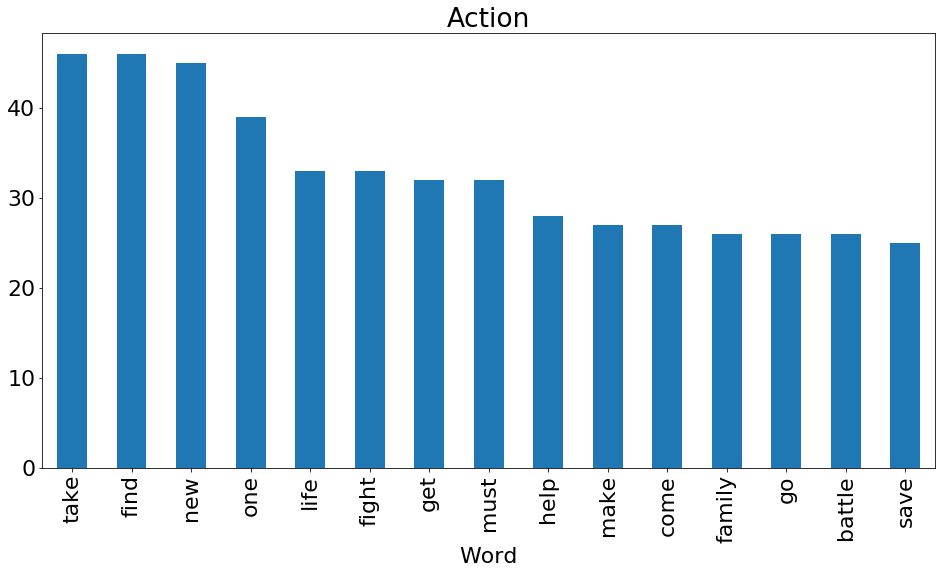

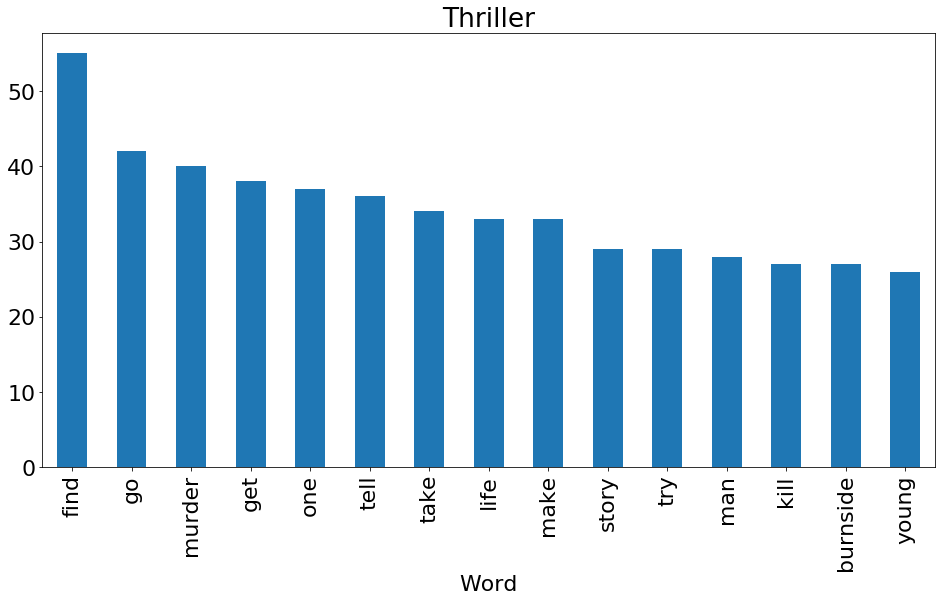

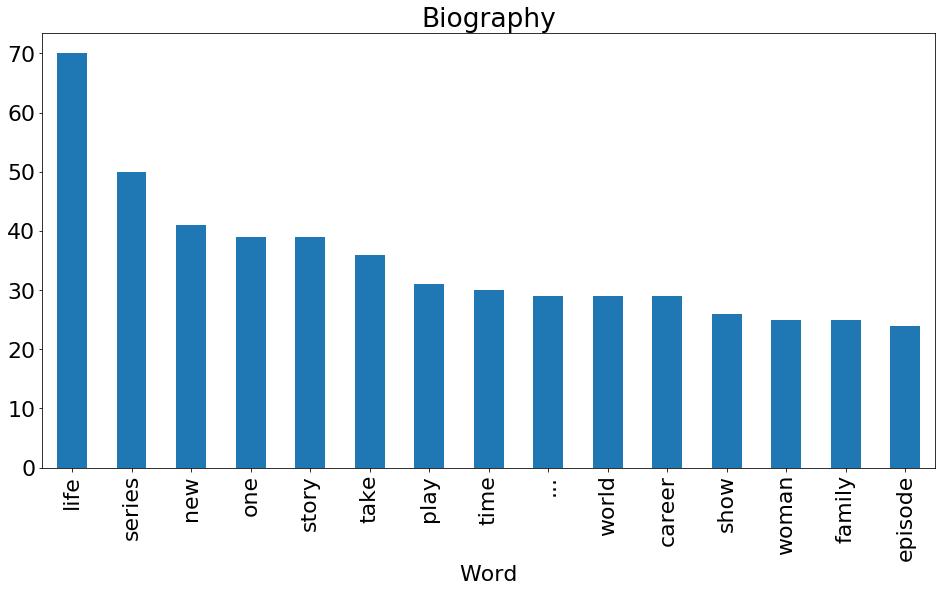

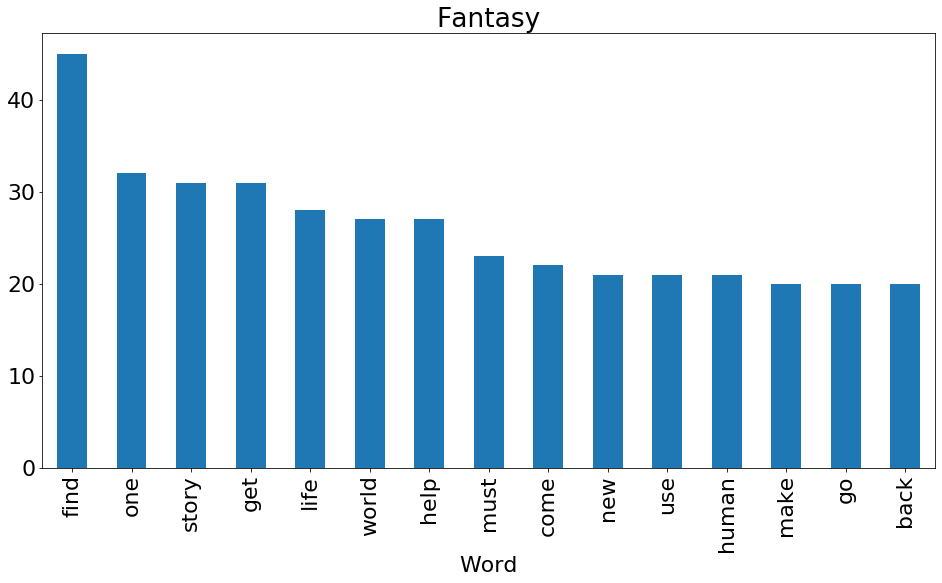

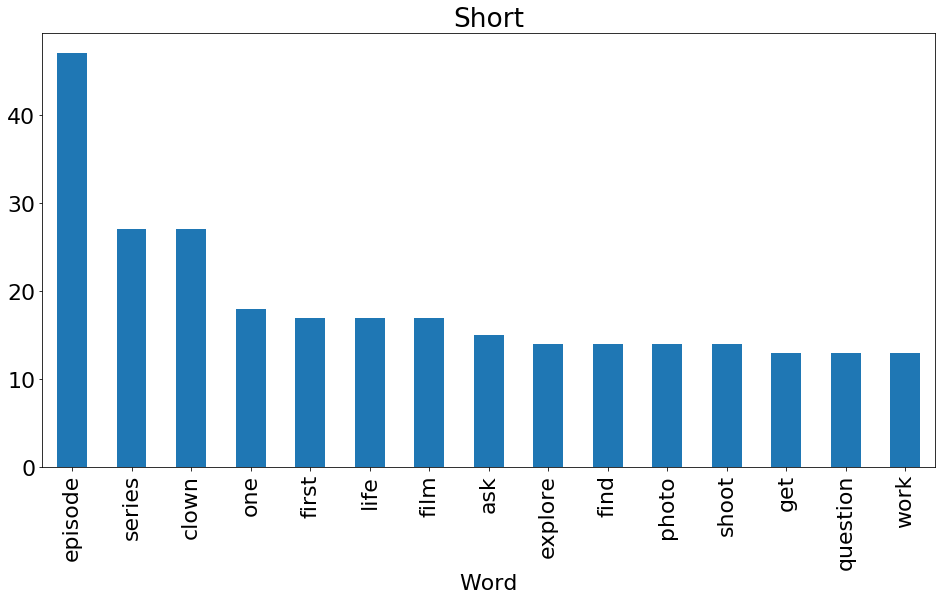

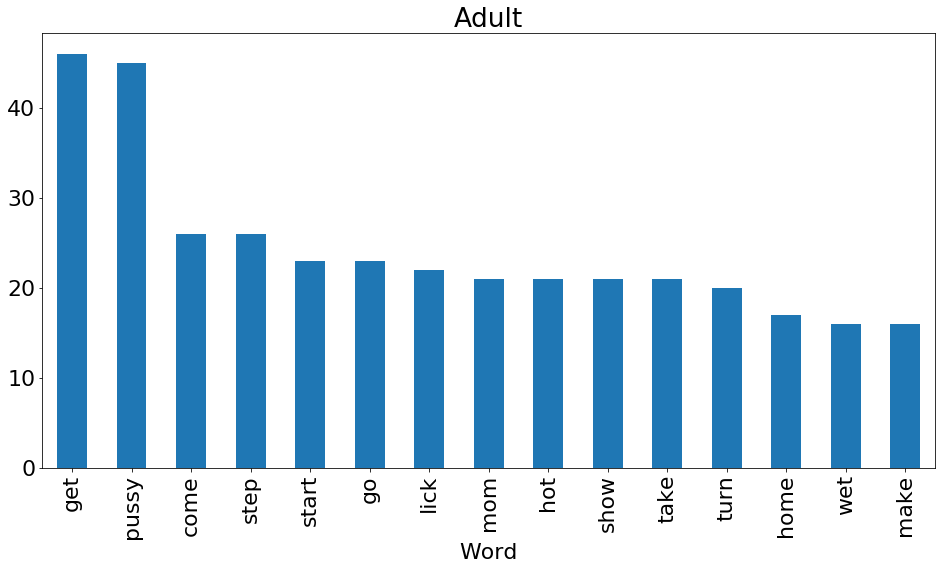

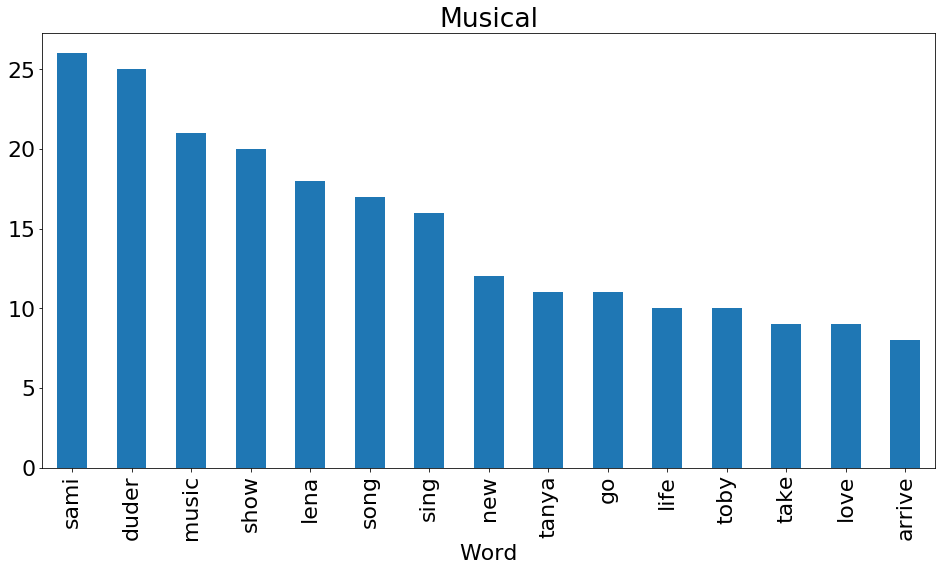

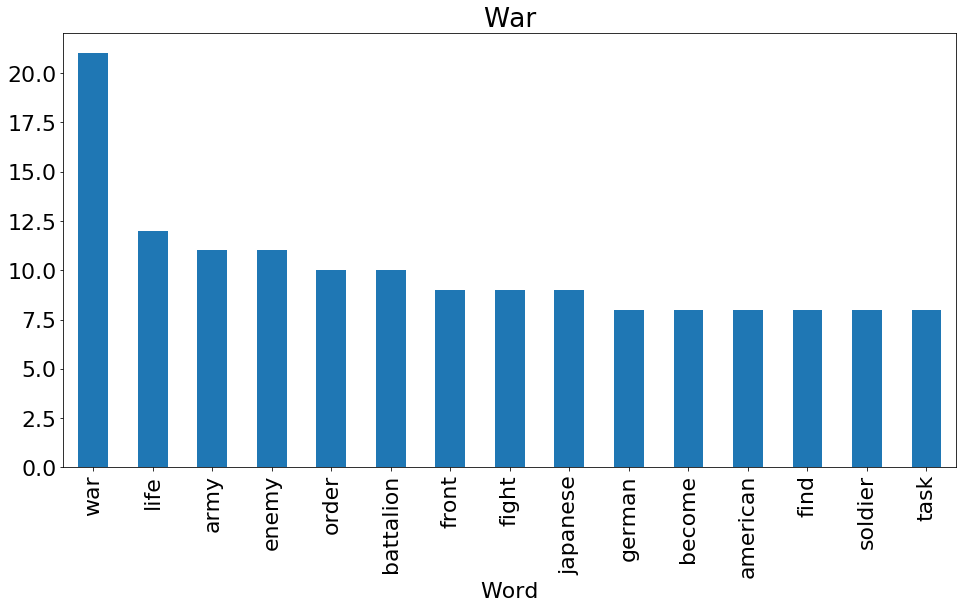

In [54]:
from nltk.probability import FreqDist
import matplotlib
from matplotlib import pyplot as plt

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token[0]

movie_counts_df = movie_counts_df[movie_counts_df['Genre'] != 'Lifestyle']

# Iterate through each movie and get the most common words. Maybe plot them?
for movie in movie_counts_df['Genre']:
    all_words = get_all_words(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist())
    fdist = FreqDist(all_words)
    
    matplotlib.rcParams.update({'font.size': 22})
    
    df = pd.DataFrame(fdist.most_common(15),columns=['Word','Count'])
    df.plot(x='Word', y='Count', kind='bar', legend=False, figsize=(16,8))
    
    plt.title(movie)
    plt.show()

We now have a count of the most common words in each genre.

# Sentiment Analysis

We will now look at how positive or negative each plot is.

Using textblob, we are calculating the sentiment polarity of each plot, each of which will lie in the range of [1,-1] where 1 means positive sentiment and -1 means a negative sentiment.

In [55]:
#pip install -U textblob
from textblob import TextBlob

movies['polarity'] = movies['plot'].map(lambda text: TextBlob(text).sentiment.polarity)

print('5 random Plots with the highest positive sentiment polarity:\n')
pl = movies.loc[movies.polarity == 1, ['plot']].sample(5).values
for p in pl:
    print(p[0],'\n')
    #Only this one takes about 5-15 mins depending on computer

5 random Plots with the highest positive sentiment polarity:

 Audrey Clarke's parents are going out for a night on the town so she having a slumber party with her two best friends Maddie and Luna. While the girls are having a blast playing music, dancing and playing games a group of known criminals are planning to rob the house. Can Audrey and her friends hold them off until the cops arrive? 

 When George accidentally ends up in the Jungle King Afterlife (read: dies), he meets the jungle kings of yesteryear... and immediately starts to feel inadequate. Returning to life, George sets out to prove that he's just as impressive as any of his ancestors! 

 After battling Yago Jones, Alfredo 'Al' Lambert, and James Foucault, Quentin 'Q' Corder and Nore Davis competed one-on-one for the title 'The Best of Throgs Neck' and the opportunity to represent at the finals against Morris Park. Nore prevailed because of his energy and delivery. 

 Dawna Lee Heising of MoreHorror in Hollywood intervie

In [56]:
print('5 random Plots with the most neutral sentiment polarity(0):\n')
pl = movies.loc[movies.polarity == 0, ['plot']].sample(5).values
for p in pl:
    print(p[0],'\n')

5 random Plots with the most neutral sentiment polarity(0):

 Akechi Mitsuhide is defeated by Hideyoshi at the Battle of Yamazaki. Kazutoyo is sent after the fleeing Mitsuhide only to find him wounded and dying. Mitsuhide dies in Kazutoyo's arms, his final words to Kazutoyo is for him and Chiyo to survive and endure. Kazutoyo orders his men that no harm come to Mitsuhide's body and not to reveal its location. Hideyoshi returns home triumphant, but the power struggle to replace Oda Nobunaga begins. 

 Oliver advertises his car for sale and the vicar shows an interest, lending Oliver his vintage Bentley, which he is considering selling. Oliver and Simon take the Bentley for a test drive but get caught up in a demonstration and end up at the police station, during which time the Bentley, left on the road, is impounded. They manage to retrieve it but not to save Oliver's car which is inadvertently sold for scrap and ends up being trashed. 

 Portuguese Sitcom based on the British hit show 

In [57]:
print('2 random Plots with the most negative polarity: \n')
pl = movies.loc[movies.polarity == -1, ['plot']].sample(2).values
for p in pl:
    print(pl[0],'\n')

2 random Plots with the most negative polarity: 

[" Chris Evans and Lucy Siegle are joined by actor, comedian and writer David Walliams, plus Angellica Bell joins the Bond stunt team. Anita Rani, Mike Dilger and Matt Allwright are all in to reveal the results of their Village Show entries, and Gyles Brandreth tells the story of the world's worst writer."] 

[" Chris Evans and Lucy Siegle are joined by actor, comedian and writer David Walliams, plus Angellica Bell joins the Bond stunt team. Anita Rani, Mike Dilger and Matt Allwright are all in to reveal the results of their Village Show entries, and Gyles Brandreth tells the story of the world's worst writer."] 



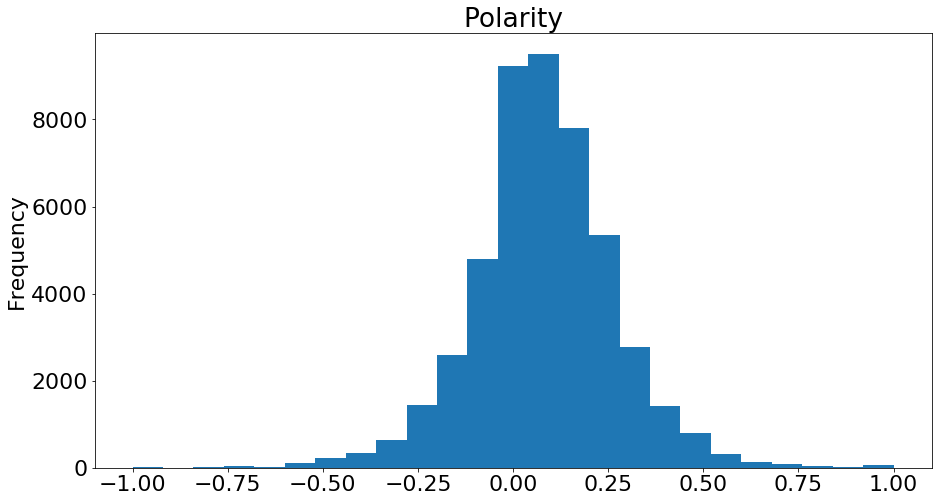

In [58]:
movies['polarity'].plot(
    kind='hist',
    bins = 25,
    legend=False, 
    figsize=(15,8))

plt.title('Polarity')

plt.show()

Vast majority of the sentiment polarity scores are hovering between -0.25 and 0.25, meaning that most of the plots in the database are more neutral sided. It is safe to say that there are more positive plots and negative plots base on the graph above. As you can see the more we more towards 1 or -1 the less amount of plots we get that have a ploarity score of 1 and -1. 

C:\Users\Mouay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


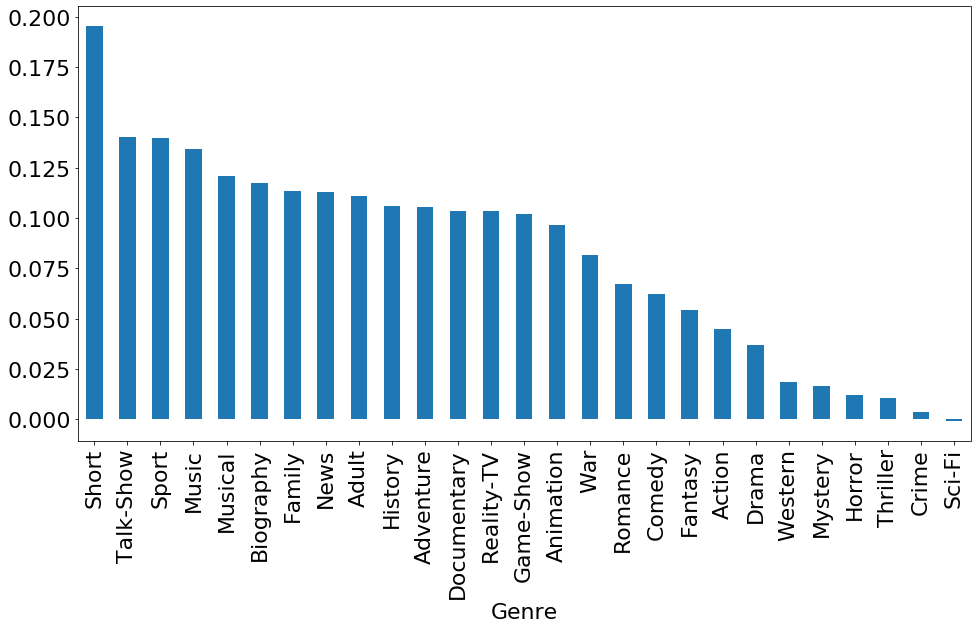

In [59]:
movie_counts_df['Avg Polarity'] = None

movie_counts_df = movie_counts_df.reset_index(drop=True)

for idx, movie in enumerate(movie_counts_df['Genre']):
    movie_counts_df.loc[idx,'Avg Polarity'] = movies[movies[movie] == 1]['polarity'].mean()

movie_counts_df = movie_counts_df.sort_values('Avg Polarity', ascending=False)
movie_counts_df.plot(x='Genre', y='Avg Polarity', kind='bar', legend=False, figsize= (16,8))

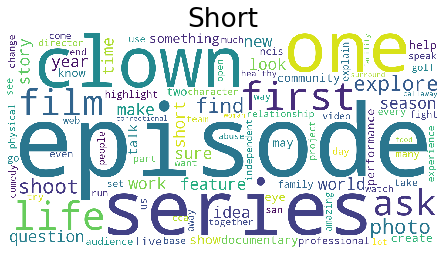

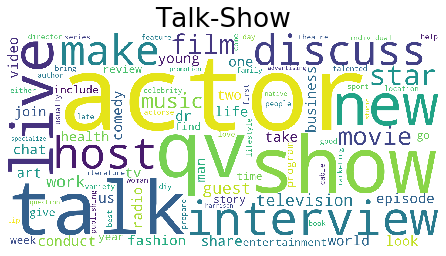

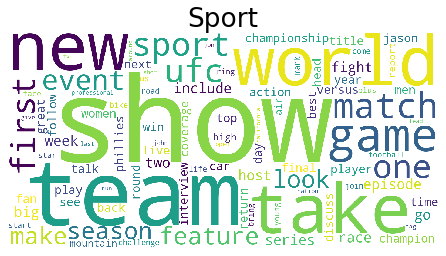

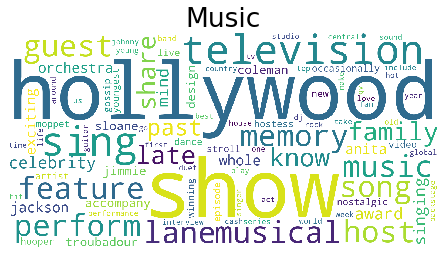

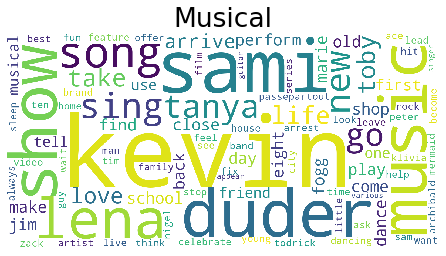

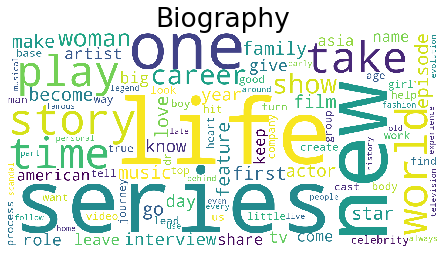

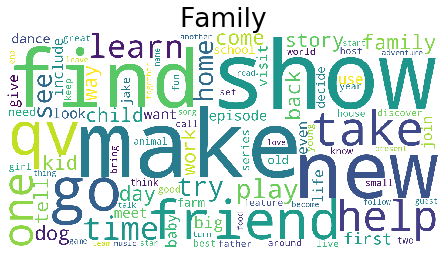

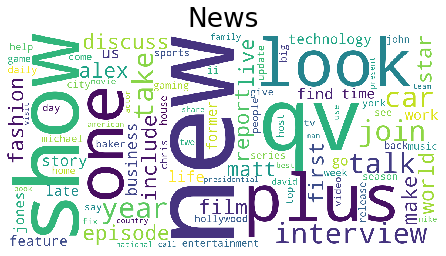

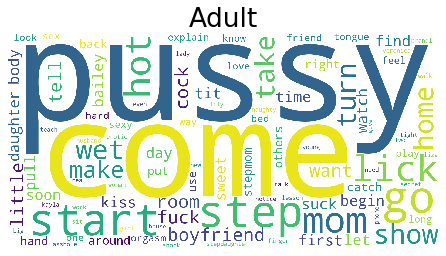

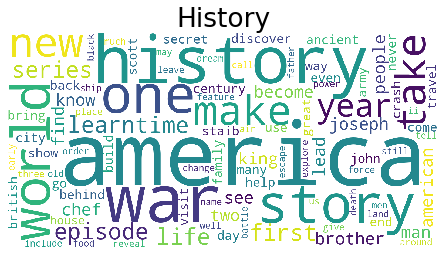

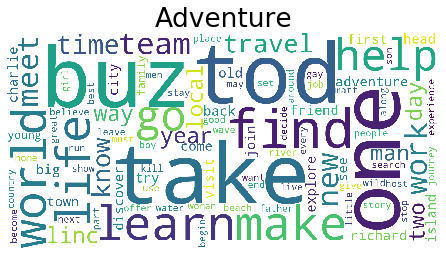

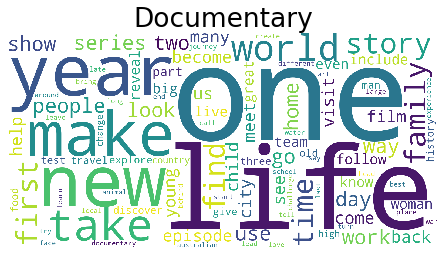

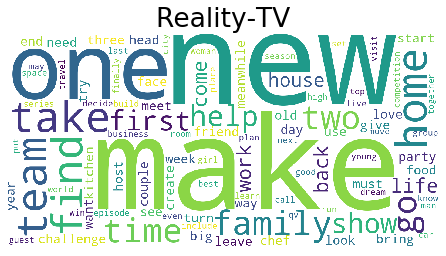

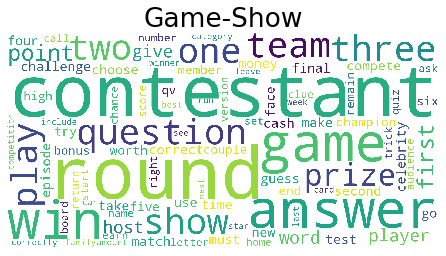

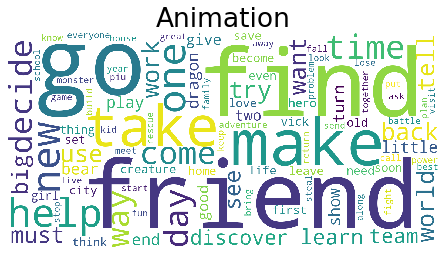

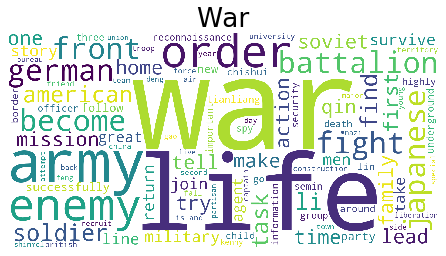

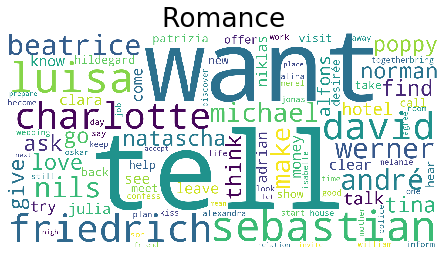

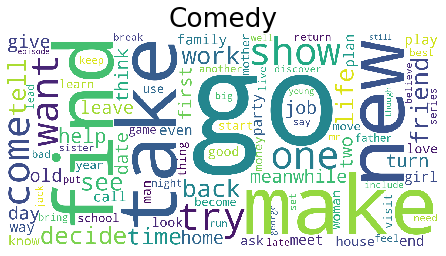

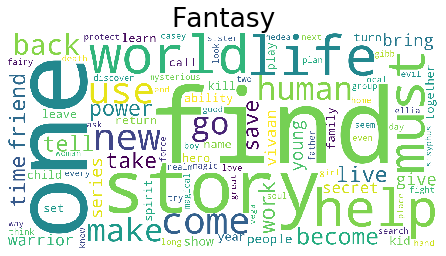

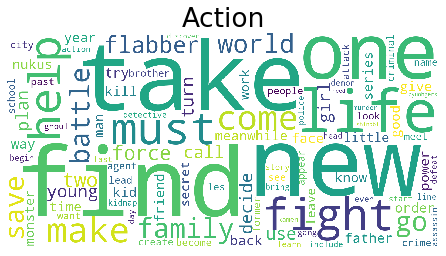

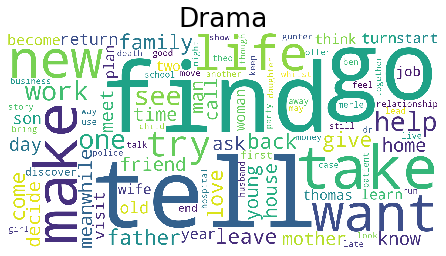

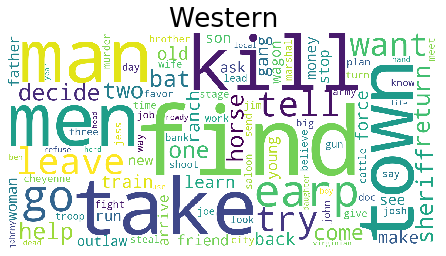

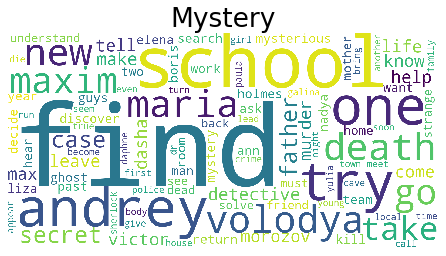

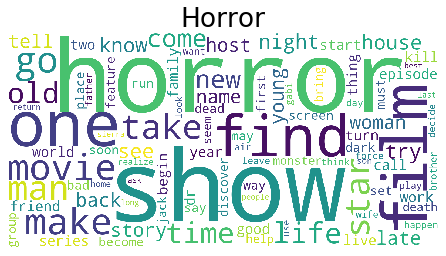

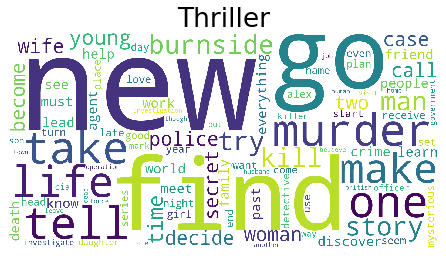

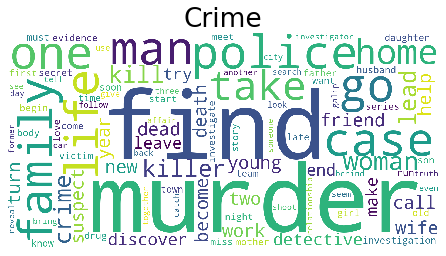

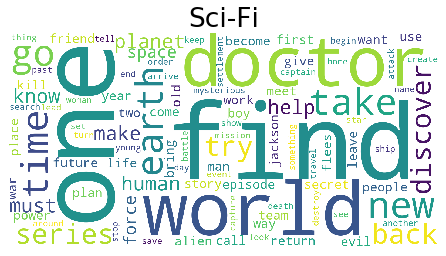

In [60]:
from wordcloud import WordCloud

for movie in movie_counts_df['Genre']:
    all_words = get_all_words(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist())
    fdist = FreqDist(all_words)
    df = pd.DataFrame(fdist.most_common(100),columns=['Word','Count'])
    wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(df['Word'].to_string()) 
    plt.title(movie)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

# Preparing data for modeling

We will not put labels to each dataset and split them into "training" and "testing". We will have half of each genre be used for training, and the other half be used for testing.

In [61]:
def get_tokens_for_model(cleaned_tokens_list, label):
    for tokens in cleaned_tokens_list:
        token_list = []
        for token in tokens:
            token_list.append([token[0], True])
        yield (dict(token_list), label)
        
data_dict = {}
for movie in movie_counts_df['Genre']:
    data_dict[movie] = list(get_tokens_for_model(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist(), movie))

In [62]:
# Lets see what one of the entries looks like.
data_dict['History'][0]

({'three': True,
  'episode': True,
  'docudrama': True,
  'present': True,
  'background': True,
  'first': True,
  'world': True,
  'war': True,
  'since': True,
  'assassination': True,
  'austro-hungarian': True,
  'archduke': True,
  'franz': True,
  'ferdinand': True,
  'declaration': True,
  'various': True,
  'contender': True,
  'mean': True,
  'thirty': True,
  'seven': True,
  'day': True,
  'elapse': True,
  '28': True,
  'june': True,
  '4': True,
  'august': True,
  '1914': True,
  'scenario': True,
  'foreign': True,
  'office': True,
  'british': True,
  'ministry': True,
  'affairs': True,
  'whose': True,
  'secretary': True,
  'sir': True,
  'edward': True,
  'grey': True,
  'series': True,
  'german': True,
  'chancellery': True,
  'berlin': True,
  'action': True,
  'narrate': True,
  'two': True,
  'young': True,
  'clerk': True,
  'thirty-seven': True,
  'enlist': True,
  'armed': True,
  'force': True,
  'miniseries': True,
  'mixture': True,
  'drama': True,
  

# Now split the data set up

Only use a subset of the data to save time.

In [63]:
train_data = []
test_data = []

for movie in data_dict:
    cut = int(len(data_dict[movie])//20)
    end_cut = cut + cut

    train_data += data_dict[movie][:cut]
    test_data += data_dict[movie][cut:end_cut]

print(len(train_data))
print(len(test_data))

2375
2375


# Build Model


In [64]:
from nltk import classify
from nltk import NaiveBayesClassifier

start = time.time()

classifier = NaiveBayesClassifier.train(train_data)

print("Training Time: ", time.time() - start)

start = time.time()

print("Accuracy is:", classify.accuracy(classifier, test_data))

print("Classifying Time: ", time.time() - start)

print(classifier.show_most_informative_features(30))

Training Time:  7.042306900024414
Accuracy is: 0.003789473684210526
Classifying Time:  6.678713321685791
Most Informative Features
             documentary = True            Short : Comedy =    319.1 : 1.0
                  acting = True           Musica : Comedy =    273.5 : 1.0
                 gregory = True              War : Comedy =    273.5 : 1.0
                  crisis = True           Musica : Comedy =    273.5 : 1.0
                    tale = True           Musica : Comedy =    273.5 : 1.0
                  direct = True           Musica : Comedy =    273.5 : 1.0
                     tim = True           Musica : Comedy =    273.5 : 1.0
                  states = True           Musica : Comedy =    273.5 : 1.0
              depression = True           Musica : Comedy =    273.5 : 1.0
                  spring = True              War : Comedy =    273.5 : 1.0
                   basic = True            Short : Comedy =    227.9 : 1.0
             interactive = True            S

That is an extremely low accuracy rate... We must be doing something wrong. Not sure what yet...

# Trying it out the classifier on our own plot.

We will try classifying the new TV show "Tiger King".

The plot is:

A rivalry between big cat eccentrics takes a dark turn when Joe Exotic, a controversial animal park boss, is caught in a murder-for-hire plot.

We expect either: Documentary or Crime

In [65]:
##### from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords


custom_plot = "A rivalry between big cat eccentrics takes a dark turn when Joe Exotic, a controversial animal park boss, is caught in a murder-for-hire plot."

tokenizer = TweetTokenizer()
custom_tokens = remove_noise(tokenizer.tokenize(custom_plot), stopwords.words('english'))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

Comedy
